In [ ]:
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt

#Relatório 3

**Nome:** Yasmin Souza Camargo

##Métodos

In [ ]:
def lagrange(m, x, y, z):
  print('\n=== LANGRANGE ===')
  pz = 0
  polinomio = ""

  for i in range(0, m):
    c = 1
    d = 1
    termo = ""

    for j in range(0, m):
      if i != j:
        c = c * (z - x[j])
        d = d * (x[i] - x[j])

        if termo == "":
          termo += "(x - {})".format(x[j])
        else:
          termo += " * (x - {})".format(x[j])

    pz = pz + y[i] * (c/d)

    if i != m-1:
      polinomio += f'{y[i]} * ({termo}/{d}) + '
    else:
      polinomio += f'{y[i]} * ({termo}/{d})'

  print("P(x) =", polinomio)
  print (f'=> Valor interpolado: {pz}')

In [ ]:
def newton(m, x, y, z):
    print('\n=== NEWTON ===')
    dely = []

    for i in range(0, m):
        dely.append(y[i])

    # construção das diferenças divididas
    polinomio = str(dely[0])
    for i in range(1, m): # 1 - 5
        for k in range(m-1, i-1, -1): # 4 - 0
            dely[k] = (dely[k] - dely[k-1]) / (x[k] - x[k-i])

        termo = str(dely[i])
        for j in range(i):
            termo += " * (x - {})".format(x[j])
        polinomio += " + " + termo

    print("P(x) =", polinomio)

    # Avaliação do polinômio pelo método de Horner
    pz = dely[m-1]
    for i in range(m-2, -1, -1):
        pz = pz * (z - x[i]) + dely[i]

    print (f'=> Valor interpolado: {pz}')

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

def spline_cubica_natural(n, x, y):
    print('\n=== SPLINE CUBICA NATURAL ===')

    if (n < 3):
        info = -1
        return "erro"

    x.sort()

    info = 0
    m = n - 2
    e = [0] * (m)
    d = [0] * (m)
    s2 = [0] * (n)
    hB = 0

    # Construção do sistema linear tridiagonal simétrico
    hA = x[1] - x[0]
    deltaA = (y[1] - y[0]) / hA
    for i in range(0, m):
        ip1 = i + 1
        ip2 = i + 2
        hB = x[ip2] - x[ip1]
        deltaB = (y[ip2] - y[ip1]) / hB

        e[i] = hB
        d[i] = 2 * (hA + hB)
        s2[ip1] = 6 * (deltaB - deltaA)
        hA = hB
        deltaA = deltaB

    # Resolução do sistema
    mat = []
    for _ in range(n-2):
        linha = [0] * (n-2)
        mat.append(linha)

    mat = np.zeros((m, m), dtype=float)
    np.fill_diagonal(mat, d)
    np.fill_diagonal(mat[:, 1:], e)
    np.fill_diagonal(mat[1:, :], e)

    mat = np.array(mat, dtype=float)
    s2.pop(n-1)
    s2.pop(0)
    s2 = np.array(s2, dtype=float)

    s2 = np.linalg.solve(mat, s2)
    s2 = np.concatenate(([0], s2, [0]))

    # Imprimindo os resultados
    splines = []
    for i in range(1, n):
        h = x[i] - x[i - 1]
        ai = y[i - 1]
        bi = ((y[i] - y[i - 1]) / h) + ((2*h *s2[i] +  s2[i - 1] * h) / 6)
        ci = s2[i] / 2
        di = (s2[i] - s2[i - 1]) / (6 * h)

        polinomio = f'{ai} + {bi:.5f} * (x - {x[i - 1]}) + {ci:.5f} * (x - {x[i - 1]})**2 + {di:.5f} * (x - {x[i - 1]})**3'
        splines.append(eval(f"lambda x: {polinomio}"))
        print(polinomio)

    return splines

In [ ]:
def minimos_quadrados(x, y, n, tipo):
  print('\n===  MÍNIMOS QUADRADOS ===')
  sumx, sumxy, sumy, sumx2 = 0, 0, 0, 0
  sumx3, sumx4, sumx2y = 0, 0, 0
  st, sr = 0, 0

  for i in range(0, n):
    if tipo == 'linear' or tipo == 'parabola':
      sumx += x[i]
      sumy += y[i]
      sumxy += x[i] * y[i]
      sumx2 += x[i] ** 2

      if tipo == 'parabola':
        sumx3 += x[i] ** 3
        sumx4 += x[i] ** 4
        sumx2y += x[i] ** 2 * y[i]

    elif tipo == 'potencia':
      if x[i] == 0:
        return 'ERRO: Não é possível calcular, x deve ser diferente de zero'
      sumx += np.log(x[i])
      sumy += np.log(y[i])
      sumxy += np.log(x[i]) * np.log(y[i])
      sumx2 += np.log(x[i]) ** 2

  xm = sumx / n
  ym = sumy / n

  if tipo == 'linear' or tipo == 'potencia':
    a1 = (n * sumxy - sumx * sumy) / (n * sumx2 - sumx * sumx)
    a0 = ym - (a1 * xm)

  elif tipo == 'parabola':
    A = np.array([[n, sumx, sumx2],
                  [sumx, sumx2, sumx3],
                  [sumx2, sumx3, sumx4]])
    B = np.array([sumy, sumxy, sumx2y])

    coeficientes = np.linalg.solve(A, B)
    a0, a1, a2 = coeficientes[0], coeficientes[1], coeficientes[2]

  for i in range(0, n):
    st = st + pow(y[i] - ym, 2)
    sr = sr + pow(y[i] - a1 * x[i] - a0, 2)
  sxy = pow(sr / (n - 2), 0.5)
  r2 = (st - sr) / st

  if tipo == 'linear':
    print(' ---> linear')
    polinomio = lambda x: a1 * x + a0
    print(f"y = {a1:.2f}x + {a0:.2f}")

  elif tipo == 'potencia':
    print(' ---> potencia')
    a0 = np.exp(a0)
    polinomio = lambda x: a0 * x ** a1
    print(f"y = {a0:.2f}x ** {a1:.2f}")

  else:
    print(' ---> parabola')
    polinomio = lambda x: a2 * x**2 + a1 * x + a0
    print(f"y = {a2:.2f}x ** 2 + {a1:.2f} * x + {a0:.2f}")

  return polinomio

In [ ]:
def grafico_mmq(x, y, f, tipo, valor):
    plt.scatter(x, y, label='Pontos', color='red')
    x_values = np.linspace(min(x), max(x), 100)
    y_values = [f(x_val) for x_val in x_values]
    plt.plot(x_values, y_values, label=tipo)
    plt.scatter(valor, f(valor), color='green', label='Valor {}'.format(valor))
    plt.xlabel('X')
    plt.ylabel('f(X)')
    plt.title('Gráfico MMQ')
    plt.legend()
    plt.grid(True)
    plt.show()

##Questões

###Questão 1
**Os dados a seguir para a densidade do gás nitrogênio versus a temperatura são provenientes de uma tabela que foi medida com alta precisão. Use polinômios de primeiro a quinto graus para fazer uma estimativa da densidade em uma temperatura de 330 K. Qual é sua melhor estimativa?**

\begin{array}{c|cccccc}
    T,K & 200 & 250 & 300 & 350 & 400 & 450 \\
    \hline
    Densidade, kg/m^3 & 1.708 & 1.367 & 1.139 & 0.967 & 0.854 & 0.759 \\
\end{array}

Para a resolução deste primeiro exercício separei as entradas da seguinte maneira, levando em consideração que a faixa da temperatura de 330 deve estar incluida:

- Polinômio de quarto grau: Removi o primeiro ponto.
- Polinômio de terceiro grau: Removi o primeiro e o último ponto.
- Polinômio de segundo grau: Removi os dois primeiros pontos.
- Polinômio de primeiro grau: Removi os dois últimos pontos.

In [ ]:
valor_estimado = 330.0

n5 = 6 #Polinômio de quinto grau
x5 = np.array([200.0, 250.0, 300.0, 350.0, 400.0, 450])
y5 = np.array([1.708, 1.367, 1.139, 0.967, 0.854, 0.759])

n4 = 5 #Polinômio de quarto grau
x4 = np.array([250.0, 300.0, 350.0, 400.0, 450])
y4 = np.array([1.367, 1.139, 0.967, 0.854, 0.759])

n3 = 4 #Polinômio de terceiro grau
x3 = np.array([250.0, 300.0, 350.0, 400.0])
y3 = np.array([1.367, 1.139, 0.967, 0.854])

n2 = 3 #Polinômio de segundo grau
x2 = np.array([300.0, 350.0, 400.0])
y2 = np.array([1.139, 0.967, 0.854])

n1 = 2 #Polinômio de primeiro grau
x1 = np.array([300.0, 350.0])
y1 = np.array([1.139, 0.967])

O método escolhido para resolver este exercício foi o método de Lagrange. A seguir, os polinômios interpoladores foram executados para cada grau (iniciando pelo quinto ao primeiro grau), utilizando os pontos de dados selecionados conforme descrito acima.
Na execução do método é mostrado o polinômio interpolador e o resultado obtido do valor interpolado.

In [ ]:
lagrange(n5, x5, y5, valor_estimado)
lagrange(n4, x4, y4, valor_estimado)
lagrange(n3, x3, y3, valor_estimado)
lagrange(n2, x2, y2, valor_estimado)
lagrange(n1, x1, y1, valor_estimado)


=== LANGRANGE ===
P(x) = 1.708 * ((x - 250.0) * (x - 300.0) * (x - 350.0) * (x - 400.0) * (x - 450.0)/-37500000000.0) + 1.367 * ((x - 200.0) * (x - 300.0) * (x - 350.0) * (x - 400.0) * (x - 450.0)/7500000000.0) + 1.139 * ((x - 200.0) * (x - 250.0) * (x - 350.0) * (x - 400.0) * (x - 450.0)/-3750000000.0) + 0.967 * ((x - 200.0) * (x - 250.0) * (x - 300.0) * (x - 400.0) * (x - 450.0)/3750000000.0) + 0.854 * ((x - 200.0) * (x - 250.0) * (x - 300.0) * (x - 350.0) * (x - 450.0)/-7500000000.0) + 0.759 * ((x - 200.0) * (x - 250.0) * (x - 300.0) * (x - 350.0) * (x - 400.0)/37500000000.0)
=> Valor interpolado: 1.029020608

=== LANGRANGE ===
P(x) = 1.367 * ((x - 300.0) * (x - 350.0) * (x - 400.0) * (x - 450.0)/150000000.0) + 1.139 * ((x - 250.0) * (x - 350.0) * (x - 400.0) * (x - 450.0)/-37500000.0) + 0.967 * ((x - 250.0) * (x - 300.0) * (x - 400.0) * (x - 450.0)/25000000.0) + 0.854 * ((x - 250.0) * (x - 300.0) * (x - 350.0) * (x - 450.0)/-37500000.0) + 0.759 * ((x - 250.0) * (x - 300.0) * (x - 

Ao analisar os resultados, é evidente que os valores obtidos são bastante próximos, destacando-se os valores interpolados para o terceiro e quarto graus, que são os mais semelhantes entre si.

De modo geral, ao aumentar o número de termos na expressão (ou seja, o grau do polinômio), permite-se que o polinômio se ajuste melhor aos pontos de dados. No entanto, à medida que o grau aumenta, também pode surgir o problema da oscilação.

Portanto, sem acesso ao valor verdadeiro, não podemos determinar com certeza qual grau proporciona a melhor estimativa. Por essa razão, uma abordagem é examinar a Tabela de Diferenças Divididas:


In [ ]:
def diferenca_dividida(x, y):
    n = len(x)
    matriz = np.zeros((n, n))
    matriz[:, 0] = y

    print('[ ordem 0,  ordem 1,  ordem 2,  ordem 3,  ordem 4,  ordem 5 ]')

    for j in range(1, n):
        for i in range(n - j):
            matriz[i][j] = (matriz[i + 1][j - 1] - matriz[i][j - 1]) / (x[i + j] - x[i])

    for linha in matriz:
      print("[", end=" ")
      for elemento in linha:
          print("{:.6f}".format(elemento), end=", ")
      print("]")

diferenca_dividida(x5, y5)

[ ordem 0,  ordem 1,  ordem 2,  ordem 3,  ordem 4,  ordem 5 ]
[ 1.708000, -0.006820, 0.000023, -0.000000, 0.000000, -0.000000, ]
[ 1.367000, -0.004560, 0.000011, 0.000000, -0.000000, 0.000000, ]
[ 1.139000, -0.003440, 0.000012, -0.000000, 0.000000, 0.000000, ]
[ 0.967000, -0.002260, 0.000004, 0.000000, 0.000000, 0.000000, ]
[ 0.854000, -0.001900, 0.000000, 0.000000, 0.000000, 0.000000, ]
[ 0.759000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, ]


Ao analisarmos essa tabela, conseguimos entender o comportamento e a estabilidade das estimativas à medida que o grau do polinômio aumenta.
Os coeficientes das ordens mais altas são próximos de zero, sugerindo uma tendência para a estabilidade das estimativas conforme o grau do polinômio aumenta. Assim, um polinômio de segundo ou terceiro grau parece ser uma escolha adequada para esta estimativa.

Portanto, considerando a precisão dos resultados e a proximidade entre os valores interpolados, a melhor estimativa para a densidade do gás nitrogênio a 330 K parece ser 1.028888 kg/m³, utilizando um polinômio de terceiro grau.

###Questão 2
**O volume específico de um vapor superaquecido está listado em tabelas de vapor para diversas temperaturas. Por exemplo, na pressão absoluta de 3.000lb/pol2:**

\begin{array}{c|ccccc}
    T, ^\circ C & 370 & 382 & 394 & 406 & 418 \\
    \hline
    V, Litro/kg & 5,9313 & 7,5838 & 8,8428 & 9,7960 & 10,5311 \\
\end{array}

**Determine V em T = 400 ºC**

Para realizar este exercício, escolhi empregar o método de Newton utilizando uma estimativa de quarto grau, utilizando todos os valores fornecidos no exercício. Similar ao método de Lagrange, a execução do método de Newton resulta na impressão do polinômio interpolador e do valor interpolado obtido.

In [ ]:
x = np.array([370.0, 382.0, 394.0, 406.0, 418.0])
y = np.array([5.9313, 7.5838, 8.8428, 9.7960, 10.5311])
n = 5
valor_estimado = 400.0

newton(n, x, y, valor_estimado)


=== NEWTON ===
P(x) = 5.9313 + 0.13770833333333332 * (x - 370.0) + -0.0013663194444444426 * (x - 370.0) * (x - 382.0) + 8.458719135802276e-06 * (x - 370.0) * (x - 382.0) * (x - 394.0) + 1.1046721353774833e-20 * (x - 370.0) * (x - 382.0) * (x - 394.0) * (x - 406.0)
=> Valor interpolado: 9.35214375


O valor obtido indica que em uma temperatura de 400 ºC tem-se o volume de vapor de aproximadamente 9.352 Litro/kg. Essa estimativa nos permite entender o comportamento do volume específico do vapor em uma temperatura que não está diretamente representada nos dados originais.

###Questão 3
**As funções de Bessel aparecem com frequência em análises avançadas de engenharia tais como o estudo de campos elétricos. Essas funções geralmente não são passíveis de avaliação simples e, portanto, são frequentemente compiladas em tabelas matemáticas padrões. Por exemplo:**

\begin{array}{c|ccccc}
    x & 1.8 & 2.0 & 2.2 & 2.4 & 2.6 \\
    \hline
    J1(x) & 0.5815 & 0.5767 & 0.5560 & 0.5202 & 0.4708 \\
\end{array}

**Estime J1(2,1)**

**a) utilizando um polinômio interpolador**

**b) utilizando splines cúbicas naturais. Observe que o valor verdadeiro é 0,5683.**

No contexto deste exercício, apliquei o método de Newton para o polinômio interpolador (letra a) e utilizei uma spline cúbica natural (letra b). Como a spline cúbica retorna quatro segmentos, realizei a estimativa para o segundo segmento, pois ele abrange o número *2.1*.

In [ ]:
x = np.array([1.8, 2.0, 2.2, 2.4, 2.6])
y = np.array([0.5815, 0.5767, 0.5560, 0.5202, 0.4708])
n = 5
valor_estimado = 2.1

newton(n, x, y, valor_estimado)
print(f'=> Valor = {spline_cubica_natural(n, x, y)[1](valor_estimado)}')


=== NEWTON ===
P(x) = 0.5815 + -0.02400000000000014 * (x - 1.8) + -0.1987499999999986 * (x - 1.8) * (x - 2.0) + 0.01666666666666044 * (x - 1.8) * (x - 2.0) * (x - 2.2) + 0.0182291666666831 * (x - 1.8) * (x - 2.0) * (x - 2.2) * (x - 2.4)
=> Valor interpolado: 0.56830390625

=== SPLINE CUBICA NATURAL ===
0.5815 + -0.05823 * (x - 1.8) + -0.25674 * (x - 1.8)**2 + -0.42790 * (x - 1.8)**3
0.5767 + -0.14269 * (x - 2.0) + -0.16554 * (x - 2.0)**2 + 0.15201 * (x - 2.0)**3
0.556 + -0.21852 * (x - 2.2) + -0.21362 * (x - 2.2)**2 + -0.08013 * (x - 2.2)**3
0.5202 + -0.26124 * (x - 2.4) + 0.00000 * (x - 2.4)**2 + 0.35603 * (x - 2.4)**3
=> Valor = 0.56092761


Ambas as estimativas são bastante próximas do valor verdadeiro, mas a estimativa do método de Newton é um pouco mais precisa, pois chegou mais próximo do valor verdadeiro enquanto que na spline apresentou diferença na terceira casa decimal.

Apesar das Splines serem geralmente mais suaves e flexíveis em lidar com conjuntos de dados complexos, os resultados obtidos demonstram que nem sempre é a melhor opção. Isso acontece porque as splines cúbicas naturais, ao ajustarem segmentos separados entre os pontos de dados, podem introduzir desvios nos valores interpolados, resultando em uma tendência a superestimar ou subestimar os resultados, especialmente em regiões com poucos pontos de dados.

Portanto, nesse caso o método de Newton se ajusta mais precisamente aos padrões nos dados fornecidos.

###Questão 4

**A viscosidade dinâmica da água μ(10^-3 N.s/m^2) está relacionada com a temperatura T(ºC) da seguinte maneira:**

\begin{array}{c|cccccc}
    T (^{\circ}\mathrm{C}) & 0 & 5 & 10 & 20 & 30 & 40 \\
    \hline
    \mu (10^{-3} \, \mathrm{N.s/m^2}) & 1{,}787 & 1{,}519 & 1{,}307 & 1{,}002 & 0{,}7975 & 0{,}6529 \\
\end{array}

**a) Trace o diagrama de dispersão dos dados.**

**b) Use o método dos mínimos quadrados para ajustar uma reta, um equação de potência e uma parábola. Para a equação de potência empregue transformações para linearizar os dados.**

**c) Verifique e justifique qual a equação do melhor ajuste. Utilize ela para prever μ em T = 7,5 ºC.**

Abaixo, apresenta-se a aplicação do método dos mínimos quadrados para ajustar uma reta, uma equação de potência e uma parábola aos dados. Os resultados incluem a função gerada para cada tipo de regressão, o valor de μ quando T = 7.5 ºC e um diagrama de dispersão dos dados, permitindo uma visualização clara dos ajustes realizados.


===  MÍNIMOS QUADRADOS ===
 ---> linear
y = -0.03x + 1.66

y(7.5) = 1.4546066666666664


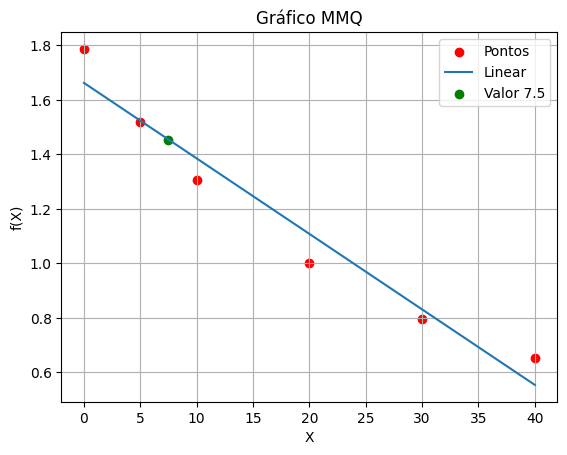


===  MÍNIMOS QUADRADOS ===
 ---> parabola
y = 0.00x ** 2 + -0.05 * x + 1.77

y(7.5) = 1.4268889576826982


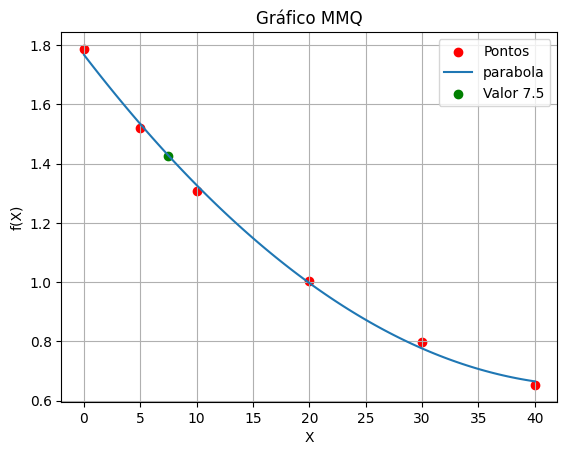


===  MÍNIMOS QUADRADOS ===


'ERRO: Não é possível calcular, x deve ser diferente de zero'

In [ ]:
x = np.array([0.0, 5.0, 10.0, 20.0, 30.0, 40.0])
y = np.array([1.787, 1.519, 1.307, 1.002, 0.7975, 0.6529])
n = 6
valor_estimado = 7.5

f = minimos_quadrados(x, y, n, 'linear')
print(f'\ny(7.5) = {f(valor_estimado)}')
grafico_mmq(x, y, f, 'Linear', valor_estimado)

g = minimos_quadrados(x, y, n, 'parabola')
print(f'\ny(7.5) = {g(valor_estimado)}')
grafico_mmq(x, y, g, 'parabola', valor_estimado)

minimos_quadrados(x, y, n, 'potencia')

Ao analisar os gráficos gerados para a regressão linear, observamos que embora alguns pontos estejam próximos da reta, outros ainda estão distantes dela. Isso sugere que os dados não são exatamente lineares, já que o modelo não captura adequadamente a tendência dos dados.

Na tentativa de aplicar a regressão polinomial de potência, nos deparamos com uma limitação: a impossibilidade de continuar a execução do método. Isso ocorre devido à presença de um valor de x igual a zero. Como o logaritmo de zero é indefinido, não é viável realizar o cálculo necessário. Portanto, esse modelo não pode ser utilizado para este conjunto de dados.

Por outro lado, ao considerar a regressão parabólica, notamos que todos os pontos estão mais próximos da curva, sugerindo um ajuste mais preciso. Isso indica que a modelagem parabólica é mais apropriada para descrever a relação entre as variáveis, proporcionando uma representação mais fiel dos dados. Logo, podems considerar que μ em T = 7,5 ºC é igual aproximadamente igual a 1.4269.

Esta análise ressalta a importância de escolher o modelo de regressão apropriado para descrever com precisão o comportamento dos dados e fazer previsões confiáveis.